# Spam email filter

## Analyze dataset

In [137]:
# importing dataset 

import pandas as pd
dataset = pd.read_csv(r'emails.csv')

In [138]:
# printing info and first 5 rows of the dataset.

print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [139]:
dataset.shape

# This dataset has two dimensions, where the first dimension (rows) has a size of 5728,
# and the second dimension (columns) has a size of 2.

(5728, 2)

In [140]:
dataset.info

# Using this ".info" function we concluded there is no need to drop any columns.

<bound method DataFrame.info of                                                    text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]>

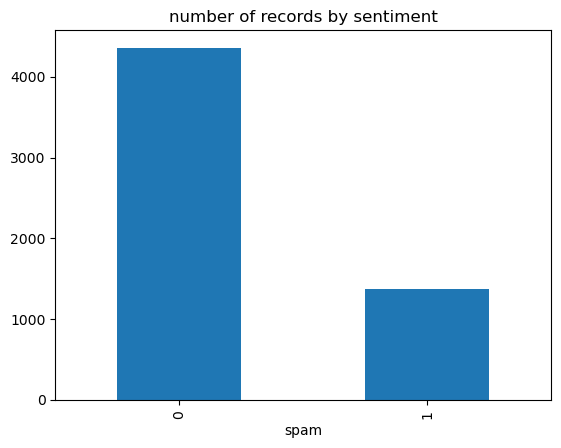

In [141]:
# Plot a graph to represent a distribution of sentiments over records.

plot = dataset.groupby("spam").size().plot(kind="bar", title="number of records by sentiment")

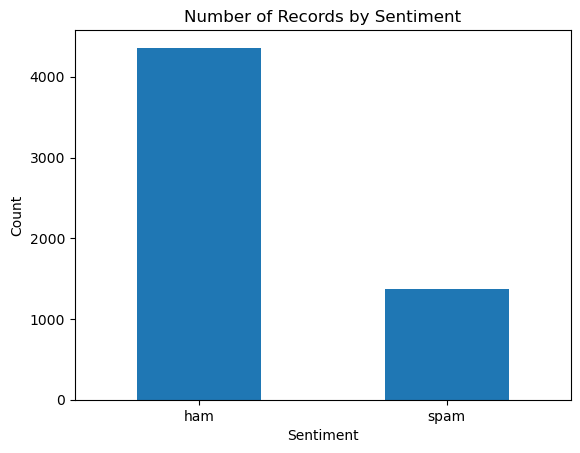

In [142]:
# Since the graph above has values "0" and "1" as labels of "ham" and "spam" and it may not
# be clear enough visual representation for someone reading this project.
# We are gonna rename these bars to "ham" and "spam".

import matplotlib.pyplot as plt

# Group by "spam" and count the occurrences
sentiment_distribution = dataset.groupby("spam").size()

# Plotting the bar chart
ax = sentiment_distribution.plot(kind="bar", title="Number of Records by Sentiment")

# Modifying x-axis tick labels
ax.set_xticklabels(["ham", "spam"], rotation=0)

ax.set_xlabel('Sentiment') 
ax.set_ylabel('Count')     

plt.show()


In [143]:
# See if you have any null values in your dataset, this can cause problem in accuracy and later in prediction
# If there are any null, we need to get rid of it by deleting it (if there are few) or replacing it.

dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [144]:
# Since the program changes its output at a times, we added this function just in case.

dataset = dataset.dropna()

# EDA

In [145]:
# Analyze and summarize data sets. Exploratory data analysis (EDA) is used to analyze 
# and investigate data sets and summarize their main characteristics.

dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [146]:
# calculate and display the count of unique values in the 'spam' column of a DataFrame.

dataset['spam'].value_counts()

# there is 4360 occurences of "spam" and "1368" of "ham".

spam
0    4360
1    1368
Name: count, dtype: int64

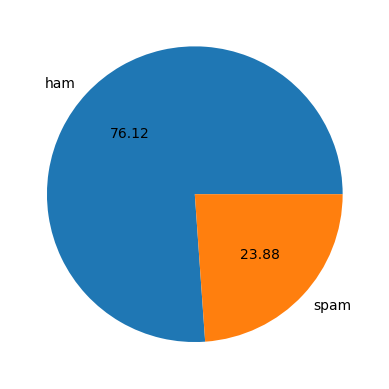

In [147]:
# let us see the percentage of "spam" and "ham" in the dataset.

import matplotlib.pyplot as plt
plt.pie(dataset['spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [148]:
import nltk
!pip install nltk               # (!) at the beginning is used to run shell commands from within a Jupyter notebook
nltk.download('punkt')          # pre-trained model for tokenization

[nltk_data] Downloading package punkt to /Users/mop1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## General info 

In [150]:
# check number of characters per mail and add a new column "num_characters_per_mail".

dataset['num_characters_per_mail'] = dataset['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# lambda takes each element x, converts x to a string using str(x), calculates the length and 
# returns this length if x is not null (using pd.notnull(x)). If x is null, it returns 0.

In [151]:
dataset.head()

,text,spam,num_characters_per_mail
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [152]:
#check number of words per mail and add a new column "num_words".

import nltk
from nltk.tokenize import word_tokenize

dataset['num_words'] = dataset['text'].apply(lambda x: len(word_tokenize(str(x))) if pd.notnull(x) else 0)

# Uses the word_tokenize function from the nltk library to tokenize the string into words.

In [153]:
dataset.head()

,text,spam,num_characters_per_mail,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [154]:
# check number of sentences per mail and add a new column "num_sentences".

import nltk
from nltk.tokenize import sent_tokenize

dataset['num_sentences'] = dataset['text'].apply(lambda x: len(sent_tokenize(str(x))) if pd.notnull(x) else 0)

# Uses the sent_tokenize function from the nltk library to tokenize the string into sentences.

In [155]:
dataset.head()

,text,spam,num_characters_per_mail,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [158]:
# General statistics for "text".

dataset[['num_characters_per_mail','num_words','num_sentences']].describe()

,num_characters_per_mail,num_words,num_sentences
count,5728.000000,5728.000000,5728.000000
mean,1556.768680,327.982542,19.483240
std,2042.649812,418.833125,35.936051
min,13.000000,3.000000,1.000000
25%,508.750000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1894.250000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [161]:
# General statistics for "ham".

dataset[dataset['spam'] == 0][['num_characters_per_mail','num_words','num_sentences']].describe()

,num_characters_per_mail,num_words,num_sentences
count,4360.000000,4360.000000,4360.000000
mean,1631.918119,346.835321,19.862615
std,1959.664549,406.228875,38.051542
min,13.000000,3.000000,1.000000
25%,577.750000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.250000,440.250000,22.000000
max,43952.000000,8479.000000,1565.000000


In [162]:
# General statistics for "spam".

dataset[dataset['spam'] == 1][['num_characters_per_mail','num_words','num_sentences']].describe()

,num_characters_per_mail,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [163]:
# Data visualization library.

import seaborn as sns

<Axes: xlabel='num_characters_per_mail', ylabel='Count'>

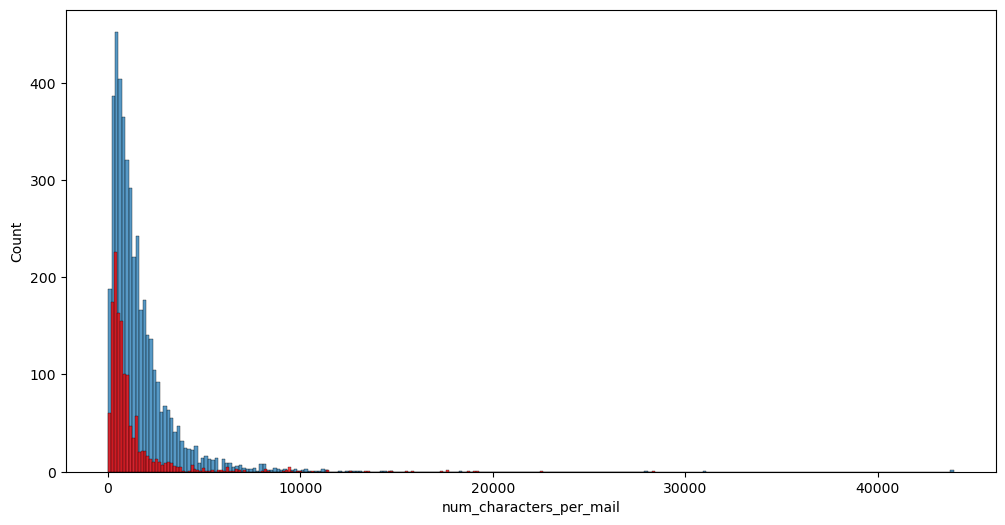

In [164]:
# Number of characters per mail: 

plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['spam'] == 0]['num_characters_per_mail'])
sns.histplot(dataset[dataset['spam'] == 1]['num_characters_per_mail'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

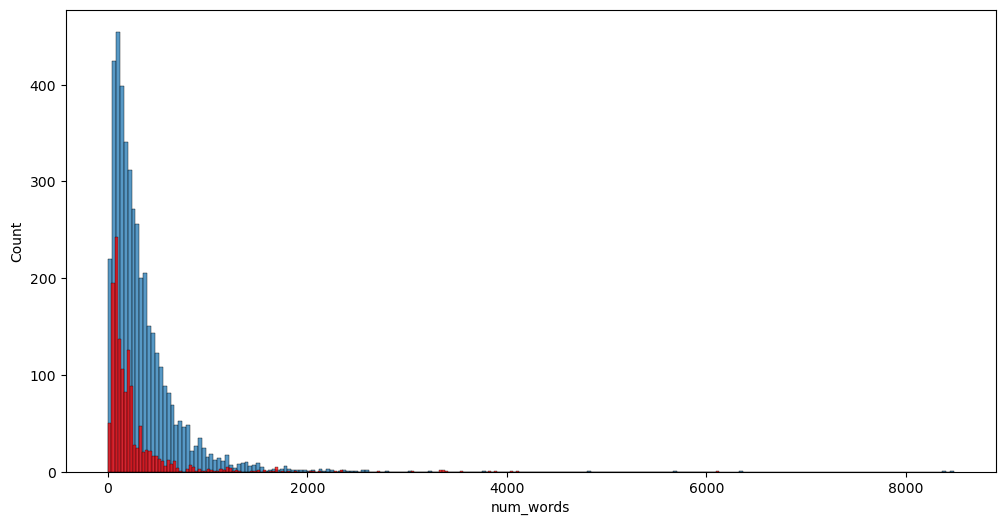

In [165]:
# Number of words per mail: 

plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['spam'] == 0]['num_words'])
sns.histplot(dataset[dataset['spam'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

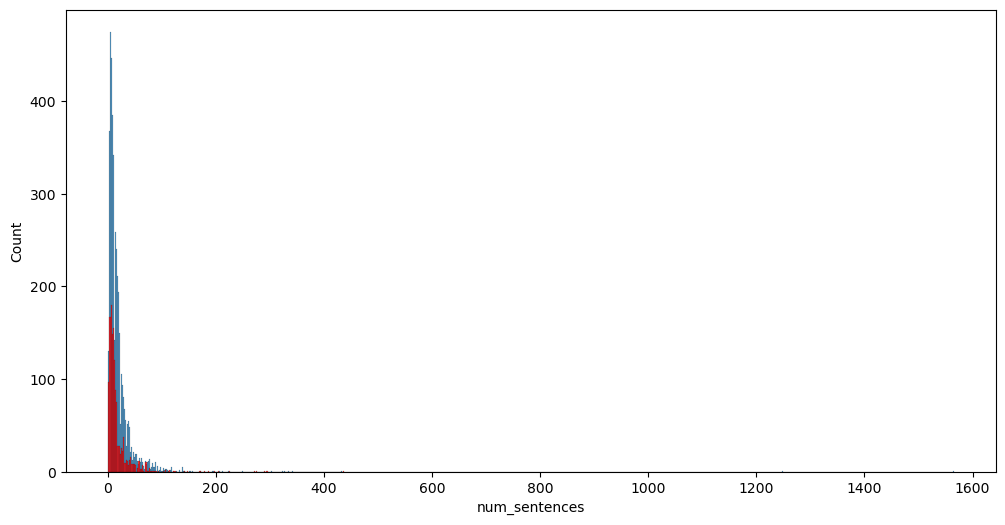

In [166]:
# Number of sentences per mail: 

plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['spam'] == 0]['num_sentences'])
sns.histplot(dataset[dataset['spam'] == 1]['num_sentences'],color='red')

/Users/mop1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


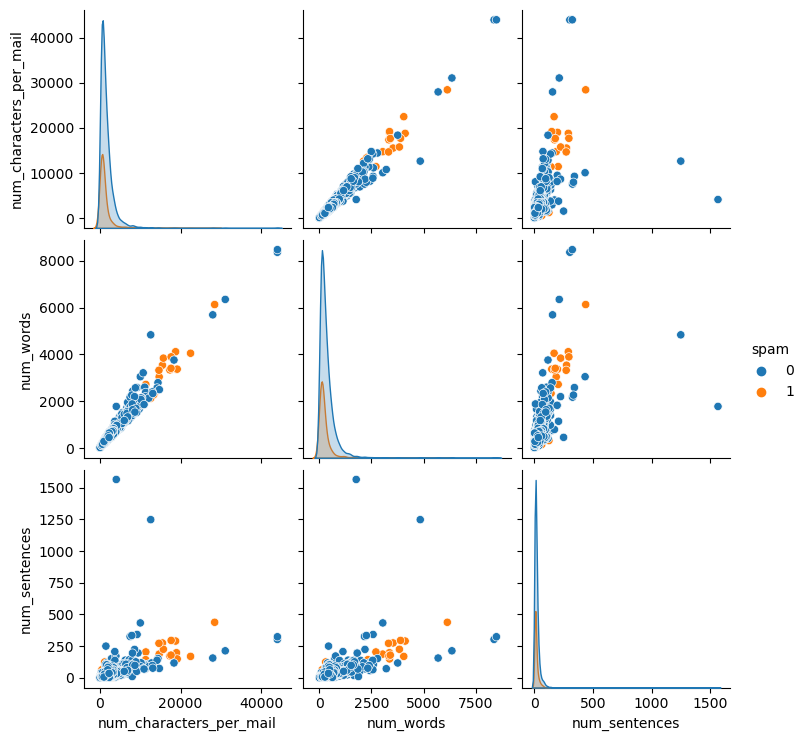

In [51]:
sns.pairplot(dataset,hue='spam')

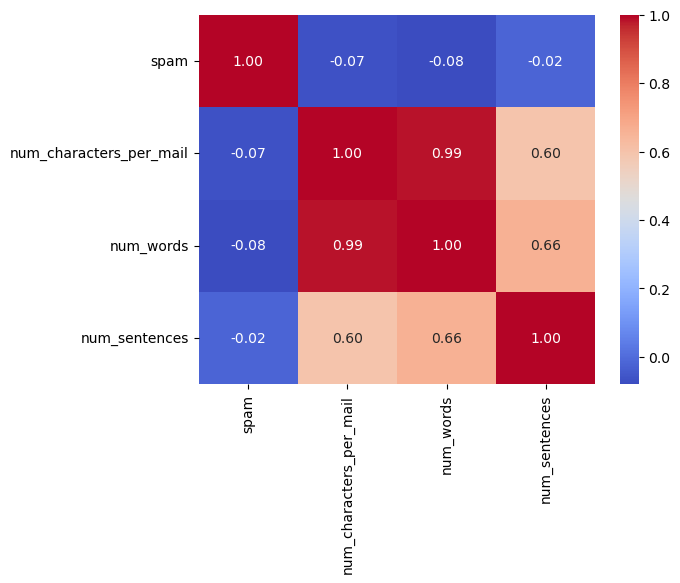

In [170]:
import matplotlib.pyplot as plt

numeric_columns = dataset.select_dtypes(include=['number'])

# Create the correlation matrix for numerical columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()


# heatmap exaplanation:

# 1. A color gradient is used to indicate the magnitude or strength of the values.
# 2. Each cell in the heatmap corresponds to an intersection of two variables in the matrix.
# 3. The intensity or darkness of the color indicates the strength of the relationship.
# 4. Numerical annotations inside each cell provide the exact values of the matrix.


# Cleaning dataset, data preprocessing

In [171]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   text                     5728 non-null   object
 1   spam                     5728 non-null   int64 
 2   num_characters_per_mail  5728 non-null   int64 
 3   num_words                5728 non-null   int64 
 4   num_sentences            5728 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 223.9+ KB


In [172]:
# Importing regular expression for pattern matching - data cleaning.

import re

def cleanTxt(text):
    text = re.sub(r'[@#]\w+', '', text)
    text = re.sub(r'\bRT\b', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub(r'([a-z])\1+', r'\1', text)
    
    return text

In [173]:
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

def tokenization_and_cleaning(text):
    word_tokens = nltk.word_tokenize(text)

    # Clean words in sentence
    clean_word_tokens = [cleanTxt(w) for w in word_tokens]

    # Remove stop words, non-alphabetic words
    clean_word_tokens_filtered = [w.lower() for w in clean_word_tokens if w.lower() not in stopwords and w.isalpha()]

    return " ".join(clean_word_tokens_filtered)

[nltk_data] Downloading package punkt to /Users/mop1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mop1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [174]:
# Example of tokenized sentence from dataset: 

tokenization_and_cleaning('subject naturally irresistible corporate ')

'subject naturaly iresistible corporate'

In [175]:
# Add a new column "text_cleaned" so we can see the progress of data cleaning.

dataset['text_cleaned'] = [tokenization_and_cleaning(mail) for mail in dataset['text']]

In [176]:
dataset

,text,spam,num_characters_per_mail,num_words,num_sentences,text_cleaned
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject naturaly iresistible corporate identit...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trading gunslinger fany meril mu...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,500,99,5,subject color printing special request adition...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get software cds software compat...
...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7,subject research development charges gpg forwa...
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28,subject receipts visit jim thanks invitation v...
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30,subject enron case study update wow al day sup...
5726,"Subject: re : interest david , please , call...",0,1060,277,6,subject interest david please cal shirley cren...


In [177]:
# check for duplicate values

dataset.duplicated().sum()

# 33 duplicate values

33

In [60]:
# remove duplicates 

dataset = dataset.drop_duplicates(keep = 'first')

In [61]:
dataset.duplicated().sum()

0

In [179]:
import pandas as pd
from nltk.stem import PorterStemmer

nltk.download('punkt')

porter = nltk.PorterStemmer()

def word_stemm(text):
    words = nltk.word_tokenize(text)
    porter_words = [porter.stem(word) for word in words]
    return " ".join(porter_words)

# Apply the word_stemm function to the 'text_cleaned' column
dataset['text_cleaned'] = dataset['text_cleaned'].apply(word_stemm)

[nltk_data] Downloading package punkt to /Users/mop1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [180]:
# Apply Lemmatier and see some examples how it works.
# Lemmatizer is used to reduce words to their base or root form, known as the lemma.


nltk.download('wordnet')

lemma = nltk.WordNetLemmatizer()
print(lemma.lemmatize('subject naturaly iresistible corporate'))

subject naturaly iresistible corporate


[nltk_data] Downloading package wordnet to /Users/mop1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Frequency Distribution

In [181]:
# Frequency distribution counts the occurrences of each unique word in the combined word list.

test=dataset['text_cleaned'].apply(lambda x: re.split("\W+",x))
lists =  test
words = []
for wordList in lists:
    words += wordList
from nltk.probability import FreqDist
fd = FreqDist(words)
fd

FreqDist({'enron': 13393, 'ect': 11427, 'subject': 10202, 'vinc': 8533, 'wil': 8240, 'hou': 5577, 'com': 5475, 'pleas': 5113, 'kaminski': 4801, 'c': 4549, ...})

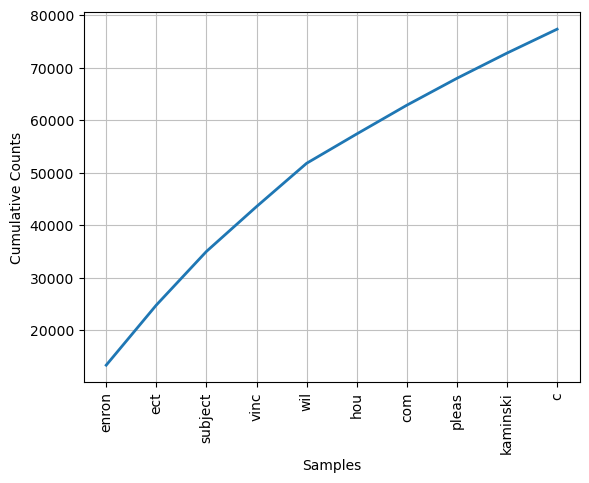

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [182]:
# Generate cumulative frequency plot for 10 most common words.  

fd.plot(10, cumulative=True)

In [189]:
dataset['text_cleaned_stemmed'] = [porter.stem(mail) for mail in dataset['text_cleaned']]

In [190]:
dataset

,text,spam,num_characters_per_mail,num_words,num_sentences,text_cleaned,text_cleaned_stemmed
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject naturali iresist corpor ident lt reali...,subject naturali iresist corpor ident lt reali...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fani meril muzo c...,subject stock trade gunsling fani meril muzo c...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject color print special request adit infor...,subject color print special request adit infor...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...,subject money get softwar cd softwar compat gr...
...,...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7,subject research develop charg gpg forward shi...,subject research develop charg gpg forward shi...
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28,subject receipt visit jim thank invit visit ls...,subject receipt visit jim thank invit visit ls...
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30,subject enron case studi updat wow al day supe...,subject enron case studi updat wow al day supe...
5726,"Subject: re : interest david , please , call...",0,1060,277,6,subject interest david pleas cal shirley crens...,subject interest david pleas cal shirley crens...


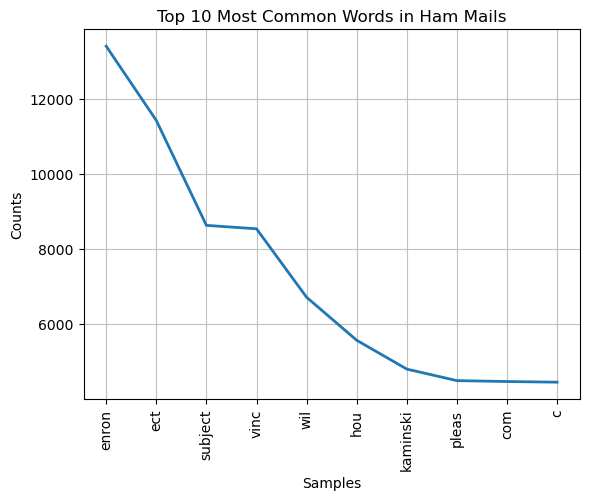

In [193]:
# Top 10 Most Common Words in Ham Mails (plot).

ham_mails = dataset[dataset['spam'] == 0.0]['text_cleaned_stemmed']

all_words_ham = [word for mail in ham_mails for word in nltk.word_tokenize(mail)]


# Plotting the most common words using nltk's FreqDist
fdist = nltk.FreqDist(all_words_ham)
fdist.plot(10, title = "Top 10 Most Common Words in Ham Mails")


plt.show()


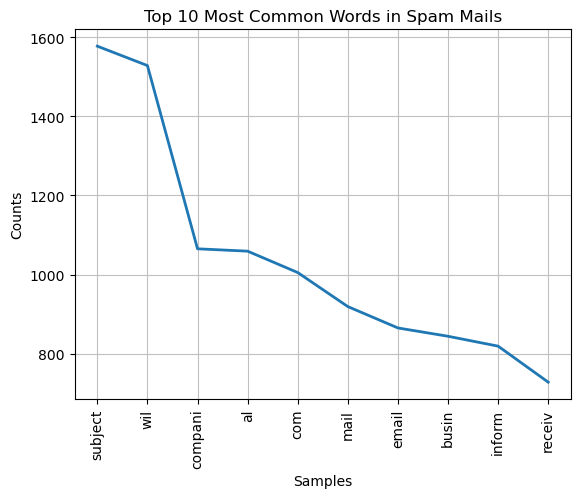

In [194]:
# Top 10 Most Common Words in Spam Mails

ham_mails = dataset[dataset['spam'] == 1.0]['text_cleaned_stemmed']

# Tokenize and create a list of all words in 'ham' mails
all_words_ham = [word for mail in ham_mails for word in nltk.word_tokenize(mail)]

# Plotting the most common words using nltk's FreqDist
fdist = nltk.FreqDist(all_words_ham)
fdist.plot(10, title="Top 10 Most Common Words in Spam Mails")


plt.show()


In [197]:
# Empty list spam_corpus that will be used to store the words from spam messages.
# Loop iterates over each message in the 'text_cleaned_stemmed' column for messages 
# labeled as spam (where 'spam' column has the value 1.0.)

spam_corpus = []
for msg in dataset[dataset['spam'] == 1.0]['text_cleaned_stemmed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [198]:
# Total number of words in the spam_corpus:

len(spam_corpus)


162481

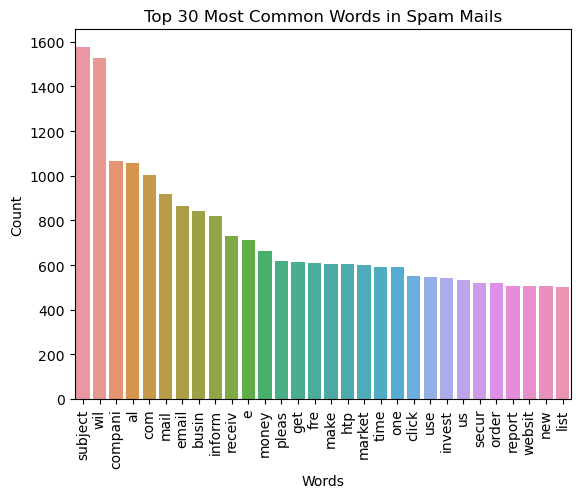

In [199]:
# Top 30 Most Common Words in Spam Mails.

from collections import Counter
import seaborn as sns

# Counter for the most common words in the spam corpus
spam_word_counter = Counter(spam_corpus)

# Plot the top 30 most common words 
sns.barplot(x=pd.DataFrame(spam_word_counter.most_common(30))[0], y=pd.DataFrame(spam_word_counter.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Most Common Words in Spam Mails')

plt.show()


In [202]:
# Empty list ham_corpus that will be used to store the words from ham messages.
# Loop iterates over each message in the 'text_cleaned_stemmed' column for messages 
# labeled as ham (where 'spam' column has the value 0.0.

ham_corpus = []
for msg in dataset[dataset['spam'] == 0.0]['text_cleaned_stemmed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [203]:
len(ham_corpus)


642708

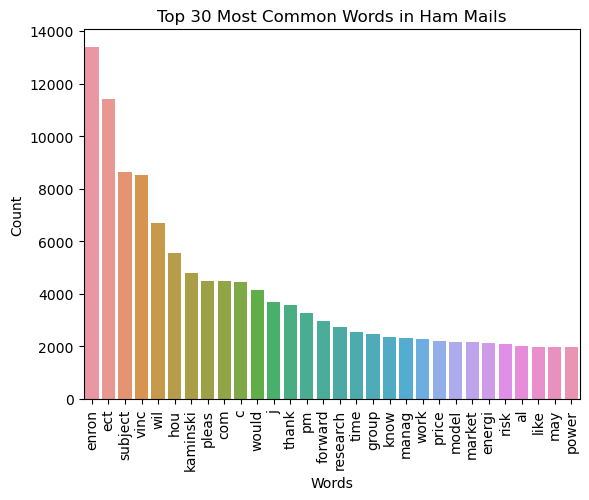

In [204]:
# Top 30 Most Common Words in Ham Mails.

# Counter for the most common words in the ham corpus
ham_word_counter = Counter(ham_corpus)

# Plot the top 30 most common words
sns.barplot(x=pd.DataFrame(ham_word_counter.most_common(30))[0], y=pd.DataFrame(ham_word_counter.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Most Common Words in Ham Mails')
plt.show()


# Developing Model Prediction

In [213]:
# CountVectorizer, converts a collection of text documents to a matrix of token counts.
# TfidfVectorizer, transforms a collection of text documents to a matrix.

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

# Vectorizer will consider the top 3000 most frequent words.
# TF-IDF reflects the importance of a word in a document relative to its frequency across multiple documents.

In [214]:
# "X" represents dataset's TF-IDF features, where each row corresponds to a document,
# and each column corresponds to a unique term in the vocabulary.

X = tfidf.fit_transform(dataset['text_cleaned_stemmed']).toarray()

In [215]:
X.shape


(5728, 3000)

In [216]:
y = dataset['spam'].values

In [217]:
# Split the dataset into training and testing sets.

# 'test_size=0.2' means that 20% of the data will be reserved for testing, and the 
# remaining 80% will be used for training

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [218]:
# Import three different Naive Bayes classifiers.

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [219]:
# Instantiating three classifiers from scikit-learn:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
# Train GaussianNB classifier.

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.961369622475856
[[841   8]
 [ 36 254]]
0.9694656488549618


In [83]:
# Train BernoulliNB classifier. 

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9596136962247586
[[805  44]
 [  2 288]]
0.8674698795180723


In [225]:
# Let's import multiple classifiers, so we can compare results and find the best accuracy.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [226]:
# Define a function that takes a classifier "clf" and trains it.

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

For  SVC
Accuracy -  0.9894644424934153
Precision -  0.9894366197183099
For  KN
Accuracy -  0.9762949956101844
Precision -  0.9747292418772563
For  NB
Accuracy -  0.9833187006145742
Precision -  0.9891696750902527
For  DT
Accuracy -  0.9183494293239683
Precision -  0.7871720116618076
For  LR
Accuracy -  0.9701492537313433
Precision -  0.9671532846715328
For  RF
Accuracy -  0.9798068481123793
Precision -  0.9962825278810409
For  AdaBoost
Accuracy -  0.9727831431079894
Precision -  0.9302325581395349
For  BgC
Accuracy -  0.9719051799824407
Precision -  0.954225352112676
For  ETC
Accuracy -  0.9780509218612818
Precision -  1.0
For  GBDT
Accuracy -  0.9578577699736611
Precision -  0.9618320610687023


/Users/mop1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


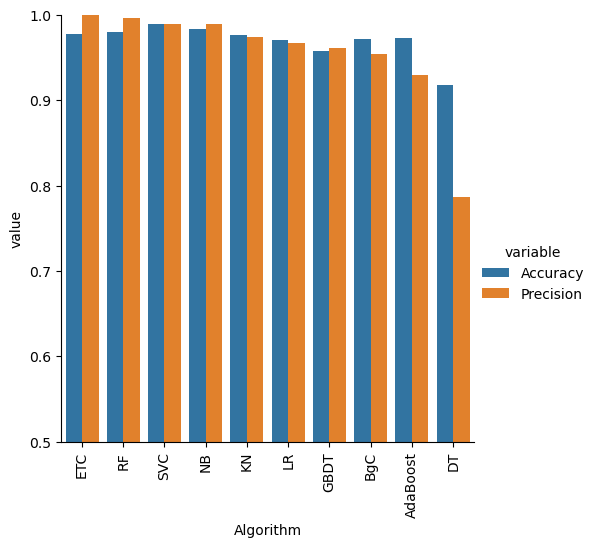

In [95]:
# Compare the performance of different classifiers based on accuracy and precision metrics.

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
performance_dataset = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

performance_dataset1 = pd.melt(performance_dataset, id_vars="Algorithm")

sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_dataset1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
performance_dataset = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [89]:
performance_dataset


,Algorithm,Accuracy,Precision
8,ETC,0.978051,1.000000
5,RF,0.979807,0.996283
0,SVC,0.989464,0.989437
2,NB,0.983319,0.989170
1,KN,0.976295,0.974729
4,LR,0.970149,0.967153
9,GBDT,0.957858,0.961832
7,BgC,0.971905,0.954225
6,AdaBoost,0.972783,0.930233
3,DT,0.918349,0.787172


In [90]:
performance_dataset1 = pd.melt(performance_dataset, id_vars = "Algorithm")


In [91]:
performance_dataset1


,Algorithm,variable,value
0,ETC,Accuracy,0.978051
1,RF,Accuracy,0.979807
2,SVC,Accuracy,0.989464
3,NB,Accuracy,0.983319
4,KN,Accuracy,0.976295
5,LR,Accuracy,0.970149
6,GBDT,Accuracy,0.957858
7,BgC,Accuracy,0.971905
8,AdaBoost,Accuracy,0.972783
9,DT,Accuracy,0.918349


/Users/mop1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


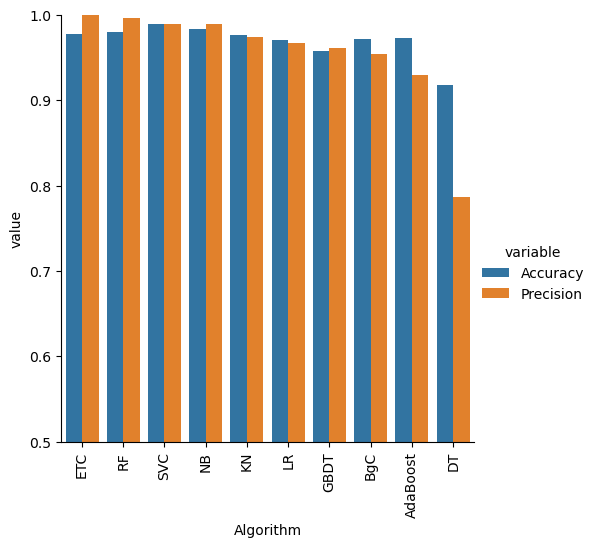

In [92]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_dataset1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [93]:
# Import RandomForestClassifier from sklearn library and train model with train sets.

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
# Evaluate the accuracy of the model with test datasets.

model.score(X_test, y_test)

0.9789288849868305

In [98]:
# With Confusion Matrix visualize the predicted values, which are predicted correct which not.

from sklearn.metrics import multilabel_confusion_matrix

y_pred = model.predict(X_test)
cf_matrix = multilabel_confusion_matrix(y_test, y_pred, labels=[1,2,3])
print(cf_matrix)

[[[ 849    0]
  [  24  266]]

 [[1139    0]
  [   0    0]]

 [[1139    0]
  [   0    0]]]


In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

In [111]:
X=dataset['text_cleaned_stemmed'];
y=dataset['spam'];
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

#20% percent goes to test set, remaining part goes to training set

In [236]:
# Text data is first vectorized using the count vectorizer.
# Then normalized using TF-IDF transformation.
# Finally, it is fed into a Support Vector Classifier (SVC) for training.

model = SVC(probability=True)
pm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', model)])
pm.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(probability=True))])

In [113]:
y_pred = pm.predict(x_test)
y_probas = pm.predict_proba(x_test)

In [114]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print('Accuracy:', pm.score(x_test, y_test)*100)
print("Training Score:",pm.score(x_train,y_train)*100)

Confusion Matrix: [[869   1]
 [ 10 259]]
Accuracy: 99.0342405618964
Training Score: 100.0


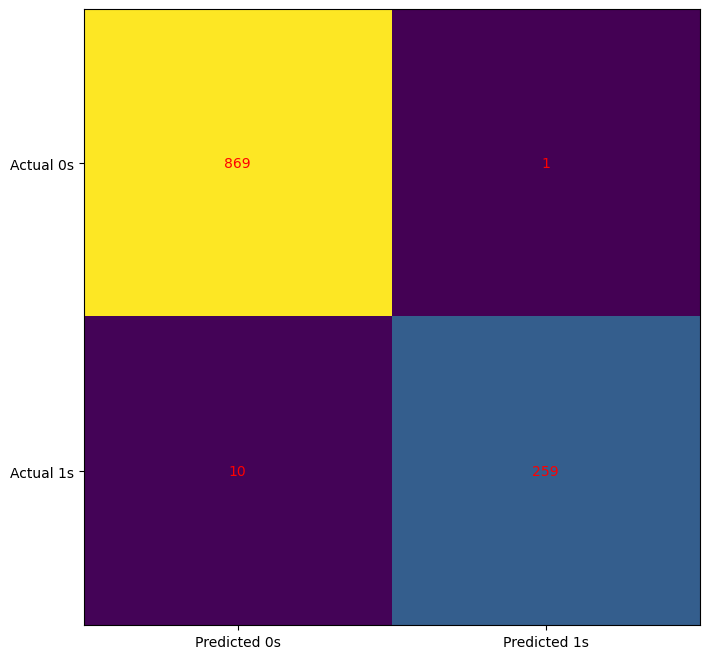

Testing  set score for SVC: 1.000000


In [127]:
# Confusion matrix plot for SVC classifier.

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Testing  set score for SVC: %f" % pm.score(x_train, y_train ))

In [116]:
from sklearn.ensemble import ExtraTreesClassifier

In [117]:
X=dataset['text_cleaned_stemmed'];
y=dataset['spam'];
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

#20% percent goes to test set, remaining part goes to training set

In [118]:
y_pred = pm.predict(x_test)
y_probas = pm.predict_proba(x_test)

In [122]:
model = ExtraTreesClassifier()
pm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', model)])
pm.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', ExtraTreesClassifier())])

In [120]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print('Accuracy:', pm.score(x_test, y_test)*100)
print("Training Score:",pm.score(x_train,y_train)*100)

Confusion Matrix: [[869   1]
 [ 10 259]]
Accuracy: 99.0342405618964
Training Score: 100.0


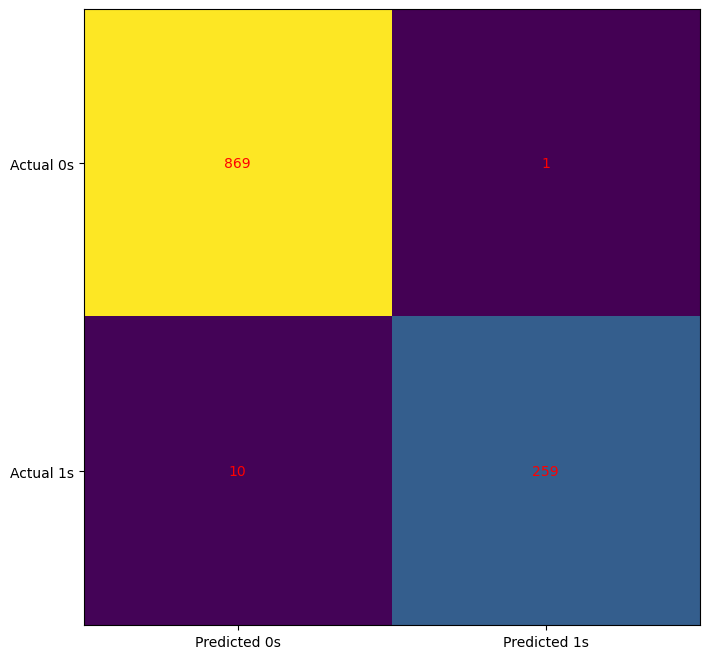

Testing  set score for ETC: 1.000000


In [123]:
# Confusion matrix plot for ExtraTreesClassifier classifier.

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Testing  set score for ETC: %f" % pm.score(x_train, y_train ))

In [229]:
from sklearn.ensemble import AdaBoostClassifier

In [230]:
X=dataset['text_cleaned_stemmed'];
y=dataset['spam'];
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

#20% percent goes to test set, remaining part goes to training set

In [231]:
y_pred = pm.predict(x_test)
y_probas = pm.predict_proba(x_test)

In [232]:
model = AdaBoostClassifier()
pm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', model)])
pm.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', AdaBoostClassifier())])

In [233]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print('Accuracy:', pm.score(x_test, y_test)*100)
print("Training Score:",pm.score(x_train,y_train)*100)

Confusion Matrix: [[884   1]
 [ 33 228]]
Accuracy: 95.98603839441536
Training Score: 98.66870362287212


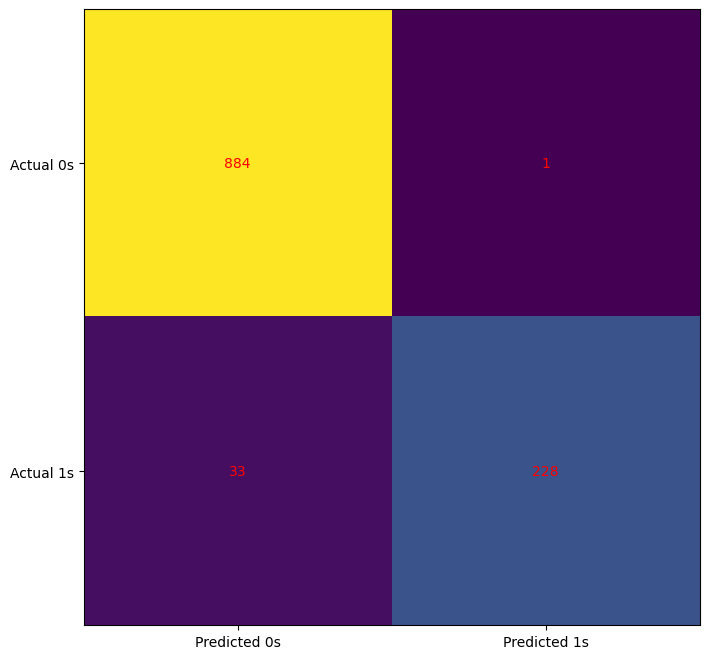

Testing  set score for AdaBoost: 0.986687


In [235]:
# Confusion matrix plot for AdaBoostClassifier classifier.

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Testing  set score for AdaBoost: %f" % pm.score(x_train, y_train ))

In [237]:
from sklearn.naive_bayes import BernoulliNB

model=BernoulliNB()

In [238]:
X=dataset['text_cleaned_stemmed'];
y=dataset['spam'];
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

#20% percent goes to test set, remaining part goes to training set

In [239]:
y_pred = pm.predict(x_test)
y_probas = pm.predict_proba(x_test)

In [240]:
model=BernoulliNB()
pm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', model)])
pm.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', BernoulliNB())])

In [241]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print('Accuracy:', pm.score(x_test, y_test)*100)
print("Training Score:",pm.score(x_train,y_train)*100)

Confusion Matrix: [[882   3]
 [ 10 251]]
Accuracy: 98.69109947643979
Training Score: 99.38891313836753


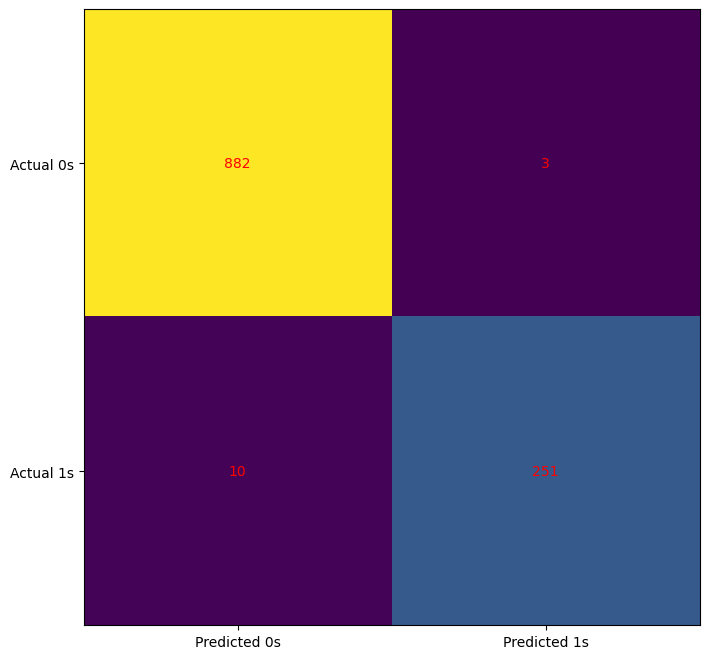

Testing  set score for Naive Bayes: 0.993889


In [242]:
# Confusion matrix plot for Naive Bayes classifier.

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Testing  set score for Naive Bayes: %f" % pm.score(x_train, y_train ))